In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
from seaborn import set_style
from sklearn import datasets
from sklearn import metrics
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
os.environ["MLFLOW_TRACKING_URI"] = "http://localhost:5000"

# Import the dataset

In [4]:
loan_data = pd.read_csv('F:\\Kaggle\\loan approval\\loan_data.csv')
loan_data.shape
loan_data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


# Inspect the dataset

In [5]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [6]:
loan_data['person_age'] = loan_data['person_age'].astype('int64')

In [7]:
loan_data.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [8]:
#Check unique values in character columns
for col in loan_data.select_dtypes(include='object').columns:
    print(f"Unique values in '{col}': {loan_data[col].unique()}")

Unique values in 'person_gender': ['female' 'male']
Unique values in 'person_education': ['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']
Unique values in 'person_home_ownership': ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
Unique values in 'loan_intent': ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
Unique values in 'previous_loan_defaults_on_file': ['No' 'Yes']


In [9]:
#Check for missing values
loan_data.isna().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

Text(0.5, 0, 'Person Age')

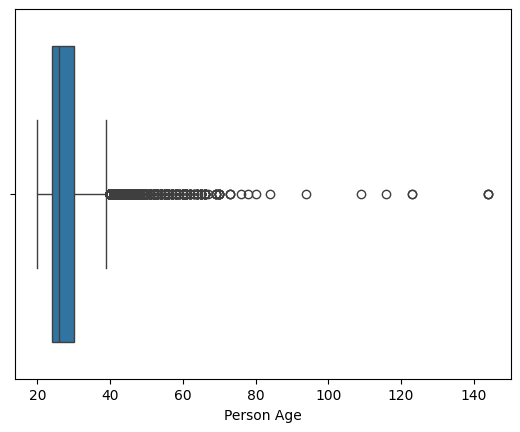

In [10]:
sns.boxplot(data=loan_data, x='person_age')
plt.xlabel('Person Age')

The "Rosner Statistic" quantifies how many standard deviations the outlier is from the mean. **The higher the statistic, the more extreme the outlier.**

In [11]:
def rosner_test(data, alpha=0.05):
    n = len(data)
    k = 10  # Number of outliers to detect
    data_sorted = np.sort(data)
    # Calculate the mean and standard deviation
    mean = np.mean(data_sorted)
    std_dev = np.std(data_sorted, ddof=1)  # Sample standard deviation
    # Check for outliers
    outliers = []
    for i in range(k):
        # Calculate the Rosner statistic
        rosner_stat = (data_sorted[-(i + 1)] - mean) / std_dev
        outliers.append((data_sorted[-(i + 1)], rosner_stat))
    return outliers

# Perform Rosner's Test
outlier_results = rosner_test(loan_data['person_age'])
print("Outliers detected with Rosner's Test:")
for value, stat in outlier_results:
    print(f"Value: {value}, Rosner Statistic: {stat}")

Outliers detected with Rosner's Test:
Value: 144, Rosner Statistic: 19.228079656872502
Value: 144, Rosner Statistic: 19.228079656872502
Value: 144, Rosner Statistic: 19.228079656872502
Value: 123, Rosner Statistic: 15.754196433313862
Value: 123, Rosner Statistic: 15.754196433313862
Value: 116, Rosner Statistic: 14.596235358794315
Value: 109, Rosner Statistic: 13.438274284274767
Value: 94, Rosner Statistic: 10.956929124590022
Value: 84, Rosner Statistic: 9.302699018133527
Value: 80, Rosner Statistic: 8.641006975550928


* Values from 109 to 144 of age can be considered outliers since theirs Rosner Statistic are pretty high.
* In real life cases, the loan applicants' age goes from 21 to 60 years old(maybe up to 80 years old but rarely).
* For that reason, observations with **age over 80 years will be excluded**.

# Statistical summary and tests

In [12]:
loan_data = loan_data[loan_data['person_age'] <= 80]
loan_data.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,44991.000000,4.499100e+04,44991.000000,44991.000000,44991.000000,44991.000000,44991.000000,44991.000000,44991.000000
mean,27.745705,7.990879e+04,5.391723,9583.236025,11.006526,0.139736,5.865684,632.579227,0.222267
std,5.895647,6.332289e+04,5.912127,6314.925978,2.979006,0.087208,3.875030,50.394127,0.415774
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.719650e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704600e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.577600e+04,8.000000,12237.500000,12.990000,0.190000,8.000000,670.000000,0.000000
max,80.000000,2.448661e+06,62.000000,35000.000000,20.000000,0.660000,30.000000,784.000000,1.000000


Text(0.5, 0, 'Person Income')

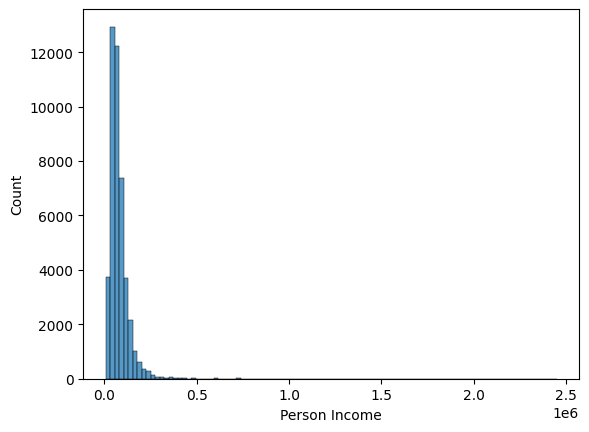

In [13]:
sns.histplot(data=loan_data, x='person_income', bins = 100)
plt.xlabel('Person Income')

Text(0.5, 0, 'Loan Amount')

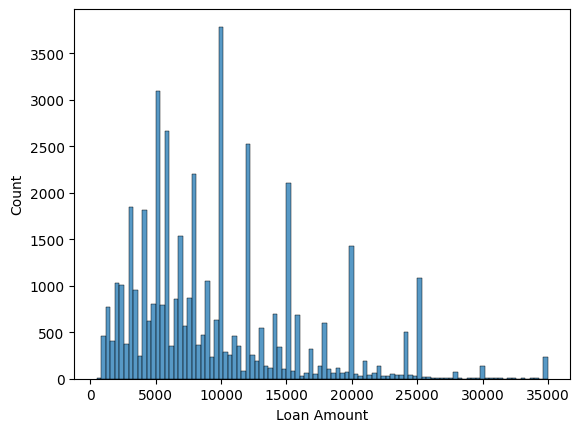

In [14]:
sns.histplot(data=loan_data, x='loan_amnt', bins = 100)
plt.xlabel('Loan Amount')

In [15]:
#ANOVA test for education groups, target variable is person_income
from scipy import stats
from scipy.stats import f_oneway
groups = loan_data.groupby('person_education')['person_income'].apply(list)
f_statistic, p_value = stats.f_oneway(*groups)
print("F-statistic:", f_statistic)
print("p-value:", p_value)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There are significant differences in income based on education.")
else:
    print("Fail to reject the null hypothesis: No significant differences in income based on education.")
#descriptive table
mean_income_table = loan_data.groupby('person_education')['person_income'].mean().reset_index()
mean_income_table.columns = ['Person Education', 'Average Income']
mean_income_table

F-statistic: 2.5860354995317025
p-value: 0.0350270493881243
Reject the null hypothesis: There are significant differences in income based on education.


,Person Education,Average Income
0,Associate,80036.193165
1,Bachelor,79277.687145
2,Doctorate,87234.541063
3,High School,79766.953626
4,Master,80491.924355


In [16]:
#Perfom point biserial correlation test for loan_status and other continuous variables
from scipy.stats import pointbiserialr
numeric_vars = ['person_income', 'person_age','person_emp_exp','loan_amnt','cb_person_cred_hist_length','credit_score']
correlations = {}
for var in numeric_vars:
    corr, p_value = pointbiserialr(loan_data['loan_status'], loan_data[var])
    correlations[var] = {'correlation': corr, 'p-value': p_value}

correlation_df = pd.DataFrame(correlations).T
print(correlation_df)

                            correlation        p-value
person_income                 -0.169040  1.352810e-285
person_age                    -0.020348   1.585860e-05
person_emp_exp                -0.019326   4.141419e-05
loan_amnt                      0.107721  3.303727e-116
cb_person_cred_hist_length    -0.014622   1.925655e-03
credit_score                  -0.007341   1.194384e-01


* Except for **credit_score**, the p-values of other variables indicates a statistically significant result. However, their correlation coefficients are pretty weak.
* With categorical variables, a Chi-squared test is suitable to find the relationship between them and the target variable 'credit_score'

In [17]:
from scipy.stats import chi2_contingency
categorical_vars = ['person_gender','person_education','person_home_ownership','loan_intent','previous_loan_defaults_on_file']
results = {}
for var in categorical_vars:
    contingency_table = pd.crosstab(loan_data[var], loan_data['loan_status'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    results[var] = {'chi2_statistic': chi2, 'p_value': p}
results_df = pd.DataFrame(results).T
print(results_df)

                                chi2_statistic        p_value
person_gender                         0.009483   9.224255e-01
person_education                      2.038595   7.286601e-01
person_home_ownership              2989.334289   0.000000e+00
loan_intent                         908.677892  3.523462e-194
previous_loan_defaults_on_file    13272.901595   0.000000e+00


* **person_gender**: p-value > 0.05 => There is no significant association between gender and loan status
* **person_education**: p-value > 0.05 => There is no significant relationship between education level and loan status
* **person_home_ownership**: p-value < 0.05 => There is a significant association between home ownership status and loan status
* **loan_intent**: p-value < 0.05 => There is a significant relationship between loan intent and loan status
* **previous_loan_defaults_on_file**: p-value < 0.05 => There is a significant association between home ownership status and loan status

C:\Users\trang\AppData\Local\Temp\ipykernel_4448\1505977590.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


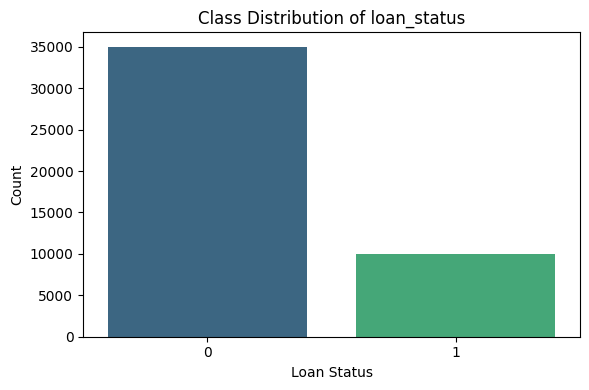

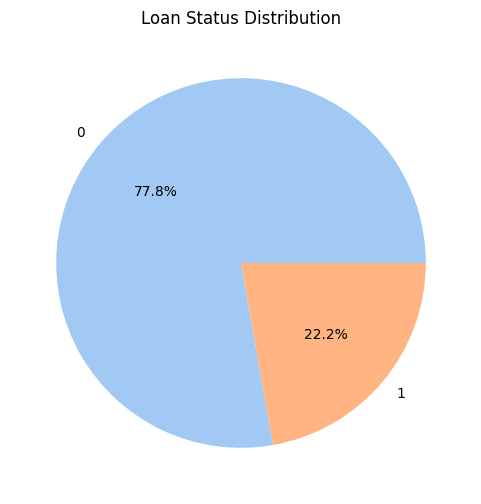

In [18]:
#Check target variable
class_counts = loan_data['loan_status'].value_counts()

# Bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Class Distribution of loan_status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.tight_layout()
plt.show()
# Pie plot
plt.figure(figsize=(6, 6))
plt.pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Loan Status Distribution')
plt.show()

# Voting Classifier

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

In [20]:
X = loan_data.drop('loan_status', axis=1)
y = loan_data['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = ['person_age','person_emp_exp','cb_person_cred_hist_length','credit_score'] 
log_features = ['person_income','loan_amnt']
# Define transformation pipelines
log_pipeline = Pipeline([
    ('log', FunctionTransformer(np.log, validate=True)),
    ('scaler', StandardScaler())])
num_pipeline = Pipeline([
    ('scaler', StandardScaler())])
preprocessor = ColumnTransformer(
    transformers=[
        ('log', log_pipeline, log_features),
        ('num', num_pipeline, numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

In [21]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

In [22]:
# Create classifiers
dt_classifier = DecisionTreeClassifier(class_weight='balanced', random_state=42, max_depth=6)
lr_classifier = LogisticRegression(class_weight='balanced', random_state=42, max_iter=200)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Create a voting classifier
voting_classifier = VotingClassifier(estimators=[
    ('decision_tree', dt_classifier),
    ('logistic_regression', lr_classifier),
    ('random_forest', rf_classifier)
], voting='soft')

# Initialize RandomUnderSampler
undersampler = RandomUnderSampler(sampling_strategy='majority', random_state=42)

# Create a pipeline with undersampling
pipeline = Pipeline(steps=[
    ('under_sampler', undersampler),
    ('preprocessor', preprocessor),
    ('classifier', voting_classifier)
])

In [23]:
#MLflow
import mlflow
import mlflow.sklearn
mlflow.set_tracking_uri("http://localhost:5000")
print("Tracking URI now =", mlflow.get_tracking_uri())
try:
    with mlflow.start_run():
        # Fit the pipeline
        pipeline.fit(X_train, y_train)
        # Predict
        y_pred = pipeline.predict(X_test)
        # Evaluate
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)  # để log được f1, precision
        # Log params
        mlflow.log_param("model_type", "VotingClassifier")
        mlflow.log_param("voting", "soft")
        mlflow.log_param("dt_max_depth", 6)
        mlflow.log_param("rf_n_estimators", 100)
        mlflow.log_param("sampling_strategy", "RandomUnderSampler")
        # Log metrics
        mlflow.log_metric("accuracy", accuracy)
        mlflow.log_metric("f1_score", report['weighted avg']['f1-score'])
        mlflow.log_metric("precision", report['weighted avg']['precision'])
        mlflow.log_metric("recall", report['weighted avg']['recall'])
        # Log model
        mlflow.sklearn.log_model(pipeline, "loan_voting_model")
except Exception as e:
    print("Error during MLflow run:", e)
    mlflow.end_run(status="FAILED")  # Mark failed nếu có bug
else:
    mlflow.end_run(status="FINISHED") 
    print("Accuracy:", accuracy)
    print("Classification Report:\n", classification_report(y_test, y_pred))

Tracking URI now = http://localhost:5000


2025/06/17 20:06:14 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/06/17 20:06:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run languid-wren-796 at: http://localhost:5000/#/experiments/0/runs/0c9a8b43a9464273a66ba7444e66065c
🧪 View experiment at: http://localhost:5000/#/experiments/0
Accuracy: 0.8235359484387154
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.79      0.87      6987
           1       0.56      0.94      0.70      2012

    accuracy                           0.82      8999
   macro avg       0.77      0.86      0.79      8999
weighted avg       0.89      0.82      0.84      8999



# Evaluate the result model

AUC Score: 0.9465


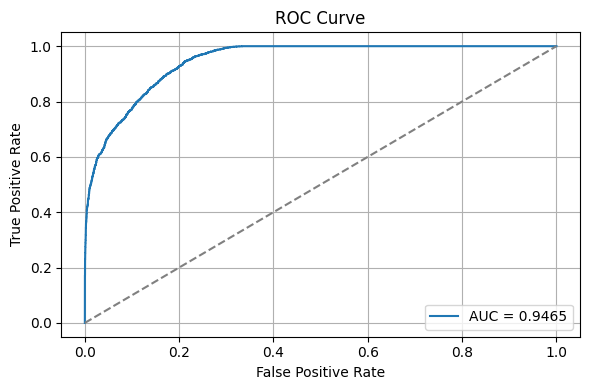

In [24]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Make predictions (probability estimates)
y_proba = pipeline.predict_proba(X_test)[:, 1]  # get probabilities for the positive class

# Calculate AUC
auc_score = roc_auc_score(y_test, y_proba)
print(f"AUC Score: {auc_score:.4f}")

# Optional: Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Calibrate

In [26]:
from sklearn.calibration import CalibratedClassifierCV

calibrated_clf = CalibratedClassifierCV(estimator=voting_classifier, method='isotonic', cv=5)

pipeline_calibrated = Pipeline(steps=[
    ('undersampler', undersampler),
    ('preprocessor', preprocessor),
    ('classifier', calibrated_clf)
])

pipeline_calibrated.fit(X_train, y_train)
y_proba = pipeline_calibrated.predict_proba(X_test)[:, 1]

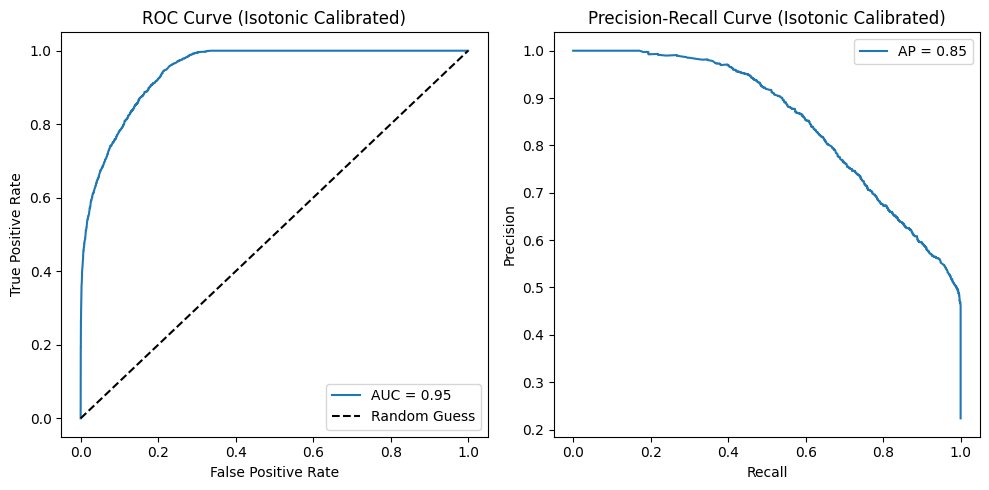

In [27]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# PR Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)
average_precision = average_precision_score(y_test, y_proba)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Isotonic Calibrated)')
plt.legend()

#PR curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f'AP = {average_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Isotonic Calibrated)')
plt.legend()

plt.tight_layout()
plt.show()

In [28]:
from sklearn.metrics import brier_score_loss

brier = brier_score_loss(y_test, y_proba)
print(f"Brier Score: {brier:.4f}")

Brier Score: 0.1005


* Based on ROC curve, the model improves after calibrating
* According to PR curve, with AP = 0.85, which means it performs well on imbalanced data (label "1" is less than label "0")
* Brier Score: 0.1005 means that the model's predicted probabilities are quite good and reasonably well-calibrated.

## Tuning Voting Classifier

✅ Best threshold (F1): 0.662
📈 Best F1-score: 0.733


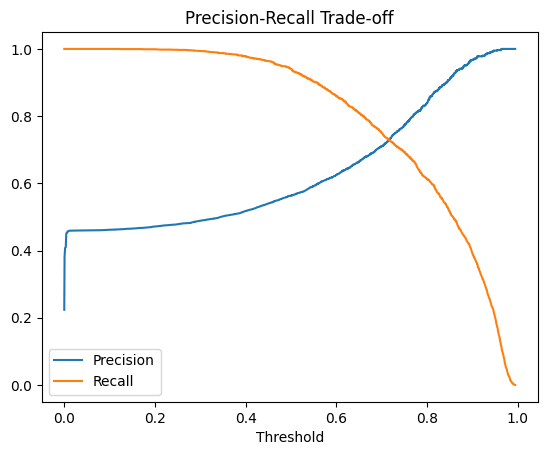

In [ ]:
from sklearn.metrics import precision_recall_curve

# Get predicted probabilities for class 1
y_proba = pipeline.predict_proba(X_test)[:, 1]
# Evaluate PR curve
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# Compute F1-score for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)

# Find the threshold with the best F1-score
best_index = np.argmax(f1_scores)
best_threshold = thresholds[best_index]
best_f1 = f1_scores[best_index]

print(f"✅ Best threshold (F1): {best_threshold:.3f}")
print(f"📈 Best F1-score: {best_f1:.3f}")

# Plot to find trade-off
import matplotlib.pyplot as plt
plt.plot(thresholds, precision[1:], label='Precision')
plt.plot(thresholds, recall[1:], label='Recall')
plt.xlabel('Threshold')
plt.legend()
plt.title('Precision-Recall Trade-off')
plt.show()

In [ ]:
# Choose a threshold, e.g., 0.6
custom_threshold = 0.662
y_pred_custom = (y_proba >= custom_threshold).astype(int)
# Apply the best threshold for final predictions
y_pred = (y_proba >= best_threshold).astype(int)
# Evaluate again
from sklearn.metrics import classification_report
print("📊 Report @ threshold = 0.5")
print(classification_report(y_test, (y_proba >= 0.5).astype(int)))
print("📊 Report @ threshold = best F1")
print(classification_report(y_test, y_pred))

📊 Report @ threshold = 0.5
              precision    recall  f1-score   support

           0       0.98      0.79      0.87      6987
           1       0.56      0.94      0.70      2012

    accuracy                           0.82      8999
   macro avg       0.77      0.86      0.79      8999
weighted avg       0.89      0.82      0.84      8999

📊 Report @ threshold = best F1
              precision    recall  f1-score   support

           0       0.94      0.89      0.91      6987
           1       0.68      0.80      0.73      2012

    accuracy                           0.87      8999
   macro avg       0.81      0.84      0.82      8999
weighted avg       0.88      0.87      0.87      8999



* with best F1, recall and precision are more balanced
* Accuracy increases from 0.82 to 0.87
* However threshold = 0.5 can still be considered when we want to keep high recall